In [1]:
#%% specifying data location data from gitHub, preparing data

import os
import xlrd
#folderData="https://raw.githubusercontent.com/geeoffgoond/psrcdata/master/"
folderData="https://rawgit.com/geeoffgoond/psrcdata/master/"
fileXL=os.path.join(folderData,"2015-pr1-hhsurvey-household.xlsx")

# importing data into pandas
import pandas as pd

psrchh=pd.read_excel(fileXL)

##fileXL

#setting dataset name, checking datatypes
##psrchh.dtypes



In [3]:
psrchh['hhnumtrips'].value_counts(normalize=True)

4     0.128152
2     0.109549
6     0.109136
5     0.070690
8     0.069864
7     0.064076
3     0.062836
10    0.057462
9     0.052501
12    0.050021
0     0.039272
11    0.029764
14    0.024390
13    0.021083
16    0.015296
15    0.014055
18    0.011162
17    0.010335
19    0.009508
20    0.008268
22    0.005788
21    0.005788
25    0.004134
1     0.003721
28    0.003721
26    0.003307
24    0.003307
23    0.002894
32    0.002067
30    0.001240
29    0.001240
27    0.000827
38    0.000827
35    0.000827
45    0.000413
34    0.000413
36    0.000413
41    0.000413
31    0.000413
33    0.000413
62    0.000413
Name: hhnumtrips, dtype: float64

In [4]:
psrchh['hhnumtrips'].describe()

count    2419.000000
mean        7.735014
std         5.891462
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        62.000000
Name: hhnumtrips, dtype: float64

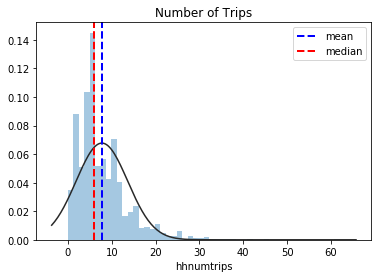

In [4]:
#plotting data
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt # needed for more customization
%matplotlib inline

#plotting with mean and median:
mnVar=psrchh['hhnumtrips'].mean()
mdVar=psrchh['hhnumtrips'].median()

sns.distplot(psrchh['hhnumtrips'].dropna(),kde=False,fit=norm)
plt.title('Number of Trips')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

In [6]:
psrchh.columns

Index([u'hhid', u'sampletype', u'tacoma_addon', u'traveldate', u'dayofweek',
       u'hhnumtrips', u'vehicle_count', u'hhsize', u'numadults',
       u'numchildren', u'numworkers', u'lifecycle', u'hh_income_detailed',
       u'hh_income_followup', u'hh_income_broad', u'sample_segname', u'h_cnty',
       u'h_city', u'h_zip', u'address_use_flag', u'panel_moveinspect',
       u'h_segname', u'h_county_name', u'h_district_name', u'h_rgc_name',
       u'h_school_district_name', u'h_uv_name', u'h_uv_group', u'h_tract',
       u'h_bg', u'h_puma10', u'res_months', u'res_dur', u'rent_own',
       u'res_type', u'res_factors_hhchange', u'res_factors_afford',
       u'res_factors_school', u'res_factors_walk', u'res_factors_space',
       u'res_factors_closefam', u'res_factors_transit', u'res_factors_hwy',
       u'res_factors_30min', u'prev_rent_own', u'prev_res_type',
       u'prev_home_wa', u'prev_home_loc_cnty', u'prev_home_loc_city',
       u'prev_home_loc_zip', u'prev_home_loc_st', u'prev_home_

In [5]:
psrchh=psrchh[["hhid", "hhnumtrips", "hh_income_detailed", "h_zip", "h_city", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min", "prev_home_loc_zip", "prev_home_loc_city", "prev_home_loc_st"]]

In [13]:
psrchh.columns

Index([u'hhid', u'hhnumtrips', u'hh_income_detailed', u'h_zip', u'h_city',
       u'res_factors_hhchange', u'res_factors_afford', u'res_factors_school',
       u'res_factors_walk', u'res_factors_space', u'res_factors_closefam',
       u'res_factors_transit', u'res_factors_hwy', u'res_factors_30min',
       u'prev_home_loc_zip', u'prev_home_loc_city', u'prev_home_loc_st'],
      dtype='object')

In [15]:
psrchh ##thought: cluster by factors influencing move to reduce variables

,hhid,hhnumtrips,hh_income_detailed,h_zip,h_city,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min,prev_home_loc_zip,prev_home_loc_city,prev_home_loc_st
0,14100001,5,5,98109,SEATTLE,1,5,1,5,4,5,4,5,5,NaN,NaN,NaN
1,14100004,0,7,98119,SEATTLE,4,4,1,5,1,4,3,1,5,NaN,NaN,NaN
2,14100007,4,2,98109,SEATTLE,3,5,3,5,3,4,5,4,5,98335.0,GIG HARBOR,WA
3,14100008,3,1,98109,SEATTLE,4,4,3,4,3,3,4,3,3,NaN,NaN,NaN
4,14100009,11,98,98102,SEATTLE,1,5,1,1,1,5,1,1,1,NaN,NaN,NaN
5,14100010,5,7,98102,SEATTLE,4,4,1,5,3,2,5,1,4,NaN,NaN,NaN
6,14100012,4,1,98102,SEATTLE,3,4,1,5,4,4,5,4,5,NaN,NaN,NaN
7,14100013,6,6,98102,SEATTLE,1,4,1,5,2,4,5,4,5,NaN,NaN,NaN
8,14100015,9,9,98122,SEATTLE,2,1,3,1,2,3,1,2,2,NaN,NaN,NaN
9,14100019,3,2,98122,SEATTLE,1,5,1,5,5,5,5,1,1,NaN,NaN,NaN


In [17]:
#%% clustering
len(psrchh.hhid.unique())==len(psrchh.hhid) #checking to make sure hhids are unique

True

In [18]:
psrchh.index=psrchh.hhid #setting hhid as the index

In [21]:
psrchh.iloc[:,5:14].dtypes #checking dtypes of clustering columns

res_factors_hhchange    int64
res_factors_afford      int64
res_factors_school      int64
res_factors_walk        int64
res_factors_space       int64
res_factors_closefam    int64
res_factors_transit     int64
res_factors_hwy         int64
res_factors_30min       int64
dtype: object

In [25]:
# standardize data:
from sklearn import preprocessing

psrchh_scaled = preprocessing.scale(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'])

#compute similarity matrix
from scipy.spatial.distance import pdist, squareform

psrchhSimi_simple = pdist(psrchh_scaled,metric='euclidean') # output is not matrix
psrchhSimi_matrix =squareform(psrchh_simple) # this is a matrix


In [29]:
from scipy.cluster.hierarchy import linkage, cut_tree
# computing the linkage
psrchhSimi_link = linkage(psrchhSimi_simple,method='average') 

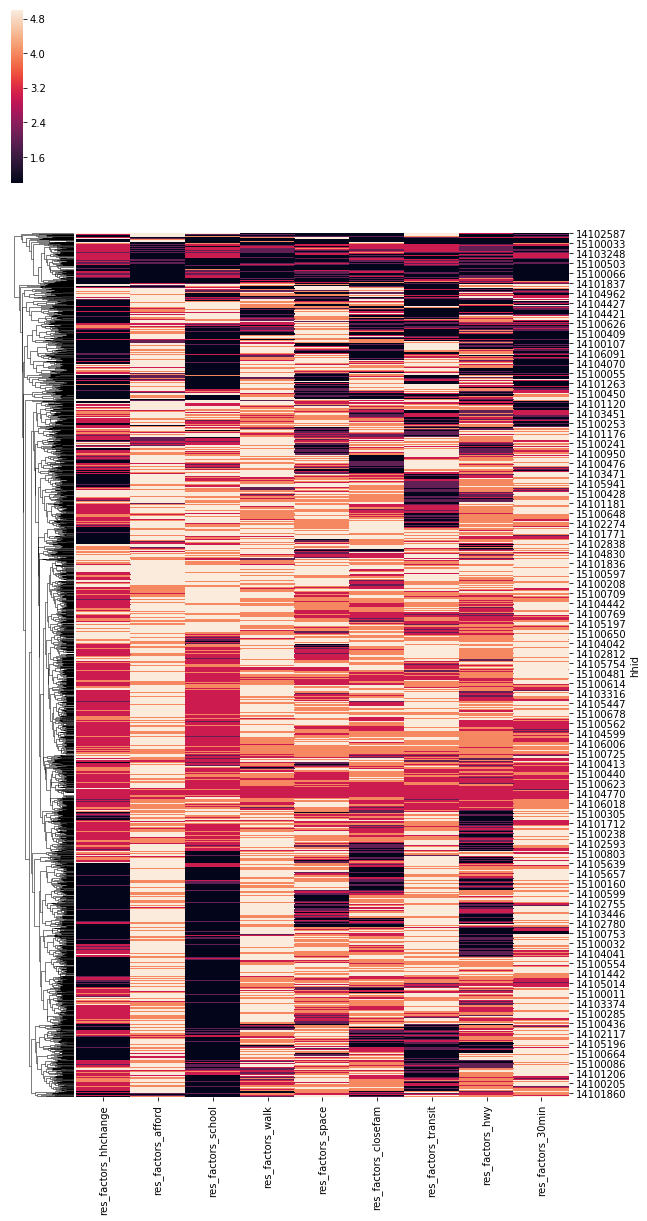

In [30]:
import seaborn as sns

g = sns.clustermap(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'],
                   metric='euclidean',
                   method='average',
                   col_cluster=False,
                  figsize=(10, 20))


In [31]:
from sklearn.metrics import silhouette_score
from numpy import ravel

for nOfClusters in range(2,5):
    # get cluster labels
    clusterLabels = ravel(cut_tree(psrchhSimi_link, nOfClusters)) # formatting cut_tree output with ravel
    # get silhouettes
    silhouette_avg = silhouette_score(psrchhSimi_matrix,clusterLabels,metric='precomputed')
    
    # print results:
    print("For n_clusters =", nOfClusters, 
          "The average silhouette_score is:", silhouette_avg)


('For n_clusters =', 2, 'The average silhouette_score is:', 0.31412619891664761)
('For n_clusters =', 3, 'The average silhouette_score is:', 0.28668689542357662)
('For n_clusters =', 4, 'The average silhouette_score is:', 0.21872816707539555)


In [34]:
import numpy as np
from sklearn.metrics import silhouette_samples

clusterLabels2=np.ravel(cut_tree(psrchhSimi_link, 2))
psrchh['sil2']=silhouette_samples(psrchhSimi_matrix, clusterLabels2, metric='precomputed')

clusterLabels3=np.ravel(cut_tree(psrchhSimi_link, 3))
psrchh['sil3']=silhouette_samples(psrchhSimi_matrix, clusterLabels3, metric='precomputed')

clusterLabels4=np.ravel(cut_tree(psrchhSimi_link, 4))
psrchh['sil4']=silhouette_samples(psrchhSimi_matrix, clusterLabels4, metric='precomputed')

In [36]:
set(psrchh[psrchh.sil4<0].index)


{14100034,
 14100046,
 14100051,
 14100053,
 14100107,
 14100125,
 14100127,
 14100178,
 14100217,
 14100380,
 14100381,
 14100395,
 14100502,
 14100543,
 14100596,
 14100641,
 14100765,
 14100868,
 14100881,
 14100889,
 14100903,
 14101000,
 14101075,
 14101096,
 14101100,
 14101127,
 14101195,
 14101206,
 14101246,
 14101260,
 14101294,
 14101389,
 14101493,
 14101514,
 14101516,
 14101588,
 14101650,
 14101699,
 14101725,
 14101732,
 14101765,
 14101837,
 14101840,
 14101885,
 14101895,
 14101902,
 14101971,
 14102013,
 14102037,
 14102097,
 14102101,
 14102135,
 14102182,
 14102272,
 14102335,
 14102604,
 14102645,
 14102660,
 14102668,
 14102683,
 14102721,
 14102723,
 14102837,
 14102845,
 14102961,
 14103000,
 14103162,
 14103182,
 14103256,
 14103289,
 14103410,
 14103415,
 14103451,
 14103516,
 14103565,
 14103585,
 14103587,
 14103615,
 14103709,
 14103737,
 14103747,
 14103797,
 14103801,
 14103806,
 14103833,
 14103898,
 14103925,
 14104017,
 14104055,
 14104068,
 14104095,

In [37]:
set(psrchh[psrchh.sil3<0].index)

{14100009,
 14100038,
 14100051,
 14100078,
 14100107,
 14100127,
 14100178,
 14100217,
 14100395,
 14100501,
 14100502,
 14100543,
 14100596,
 14100641,
 14100750,
 14100768,
 14100770,
 14100771,
 14100868,
 14100881,
 14101187,
 14101246,
 14101263,
 14101306,
 14101493,
 14101514,
 14101699,
 14101725,
 14101754,
 14101837,
 14101840,
 14101885,
 14101895,
 14101971,
 14102013,
 14102033,
 14102135,
 14102157,
 14102182,
 14102335,
 14102604,
 14102641,
 14102646,
 14102660,
 14102668,
 14102690,
 14102837,
 14102845,
 14102961,
 14103000,
 14103162,
 14103256,
 14103289,
 14103301,
 14103410,
 14103415,
 14103516,
 14103624,
 14103704,
 14103747,
 14103797,
 14103806,
 14103832,
 14103833,
 14103898,
 14103925,
 14104055,
 14104068,
 14104095,
 14104100,
 14104167,
 14104241,
 14104259,
 14104278,
 14104325,
 14104366,
 14104399,
 14104421,
 14104458,
 14104485,
 14104490,
 14104566,
 14104761,
 14104813,
 14104853,
 14104987,
 14105000,
 14105006,
 14105101,
 14105260,
 14105270,

In [38]:
set(psrchh[psrchh.sil2<0].index)

{14100009,
 14100051,
 14100078,
 14100127,
 14100178,
 14100501,
 14100750,
 14100768,
 14100770,
 14100771,
 14100881,
 14101187,
 14101246,
 14101306,
 14101493,
 14101514,
 14101725,
 14101754,
 14101895,
 14102033,
 14102135,
 14102157,
 14102335,
 14102604,
 14102641,
 14102646,
 14102660,
 14102690,
 14102837,
 14102845,
 14103162,
 14103289,
 14103301,
 14103415,
 14103624,
 14103747,
 14104055,
 14104100,
 14104167,
 14104241,
 14104325,
 14104366,
 14104421,
 14104566,
 14104761,
 14105000,
 14105101,
 14105260,
 14105270,
 14105388,
 14105415,
 14105523,
 14105560,
 14105580,
 14105590,
 14105759,
 14105768,
 14105957,
 15100007,
 15100026,
 15100098,
 15100136,
 15100137,
 15100156,
 15100161,
 15100224,
 15100233,
 15100239,
 15100257,
 15100349,
 15100370,
 15100373,
 15100380,
 15100398,
 15100408,
 15100409,
 15100422,
 15100442,
 15100450,
 15100474,
 15100510,
 15100567,
 15100585,
 15100587,
 15100592,
 15100619,
 15100666,
 15100763,
 15100793}

In [39]:
set(psrchh[psrchh.sil4<0].index)&set(psrchh[psrchh.sil3<0].index)&set(psrchh[psrchh.sil2<0])

set()

In [40]:
psrchh['k3']=clusterLabels2 #setting clusterlabes

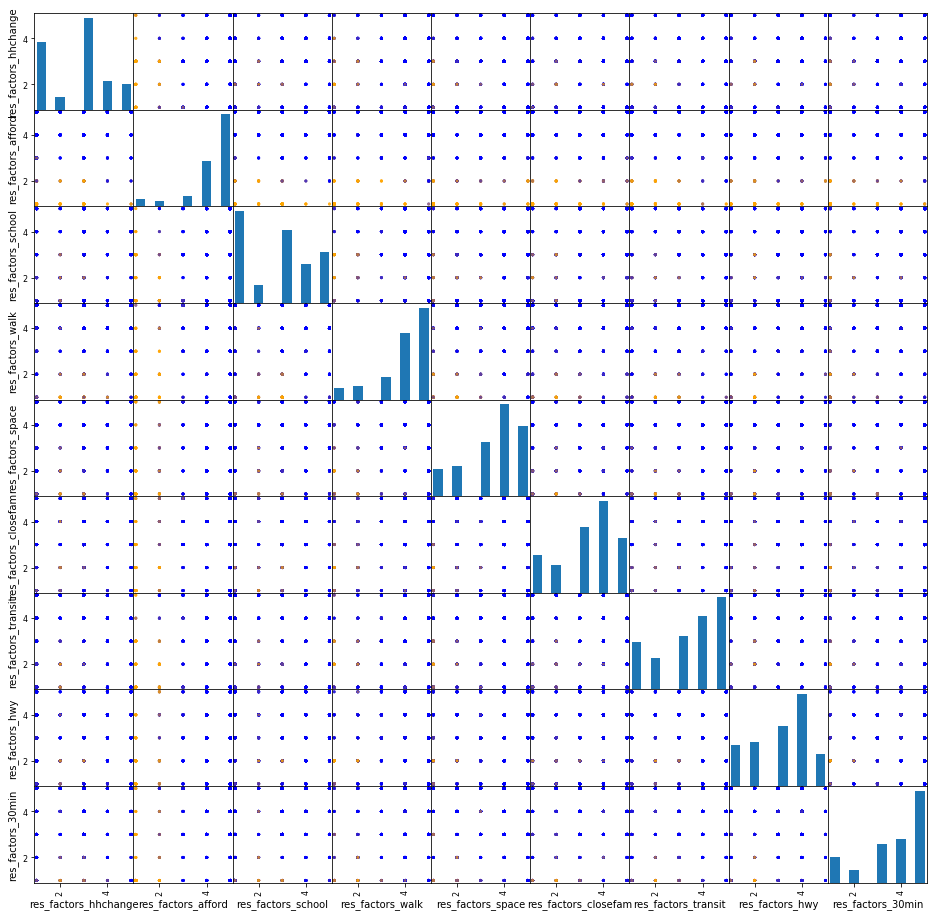

In [41]:
import matplotlib.pyplot as plt

myPalette = {0 : 'b',1 : 'orange',2 : 'r'}      
myColors = [myPalette[l] for l in psrchh.loc[:,'k3']]

pd.plotting.scatter_matrix(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'],
                           figsize=(16, 16),
                           c=myColors)
plt.show()

In [42]:
psrchh

,hhid,hhnumtrips,hh_income_detailed,h_zip,h_city,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,...,res_factors_transit,res_factors_hwy,res_factors_30min,prev_home_loc_zip,prev_home_loc_city,prev_home_loc_st,sil2,sil3,sil4,k3
hhid,,,,,,,,,,,,,,,,,,,,,
14100001,14100001,5,5,98109,SEATTLE,1,5,1,5,4,...,4,5,5,NaN,NaN,NaN,0.399463,0.380085,0.296274,0
14100004,14100004,0,7,98119,SEATTLE,4,4,1,5,1,...,3,1,5,NaN,NaN,NaN,0.211820,0.125336,0.135703,0
14100007,14100007,4,2,98109,SEATTLE,3,5,3,5,3,...,5,4,5,98335.0,GIG HARBOR,WA,0.482574,0.471790,0.422757,0
14100008,14100008,3,1,98109,SEATTLE,4,4,3,4,3,...,4,3,3,NaN,NaN,NaN,0.333986,0.333564,0.299791,0
14100009,14100009,11,98,98102,SEATTLE,1,5,1,1,1,...,1,1,1,NaN,NaN,NaN,-0.092889,-0.093415,0.162618,0
14100010,14100010,5,7,98102,SEATTLE,4,4,1,5,3,...,5,1,4,NaN,NaN,NaN,0.269524,0.223873,0.208994,0
14100012,14100012,4,1,98102,SEATTLE,3,4,1,5,4,...,5,4,5,NaN,NaN,NaN,0.413693,0.390973,0.376727,0
14100013,14100013,6,6,98102,SEATTLE,1,4,1,5,2,...,5,4,5,NaN,NaN,NaN,0.323328,0.208637,0.229694,0
14100015,14100015,9,9,98122,SEATTLE,2,1,3,1,2,...,1,2,2,NaN,NaN,NaN,0.486646,0.418204,0.386536,1


In [7]:
psrchh['res_factors_afford'].describe()

count    2419.000000
mean        4.308805
std         1.045357
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: res_factors_afford, dtype: float64

In [9]:
psrchh.prev_home_loc_st.value_counts() #checking states of contributors

WA     706
CA      22
OR      11
 CA      7
NY       7
 FL      6
 TX      5
IL       5
AZ       5
CO       4
 PA      4
 OR      4
MT       4
TX       4
 CO      3
 DC      3
OH       3
ID       3
FL       3
KS       3
 IL      3
PA       3
UT       3
 NC      2
 NY      2
NH       2
 GA      2
 VA      2
 MA      2
 MO      2
AK       2
VA       2
MA       2
MN       2
MI       2
 LA      2
MO       2
LA       2
WY       1
 HI      1
 AR      1
NJ       1
 AL      1
NC       1
 KS      1
 WI      1
MS       1
 NE      1
 NM      1
 OH      1
 MN      1
 RI      1
MD       1
OK       1
IN       1
AR       1
DE       1
 MD      1
 ME      1
 AZ      1
Name: prev_home_loc_st, dtype: int64

In [10]:
WASzip=psrchh[psrchh.prev_home_loc_st=='WA']

In [12]:
WASzip.reset_index(inplace=True,drop=True) # resetting the index -- good practice

In [15]:
WASzip.prev_home_loc_zip[0] #the first value

98335.0

In [18]:
#As the cells have integers, I am confident to use comparisons:
WASzip=WASzip[(WASzip.prev_home_loc_zip <=99403) & (WASzip.prev_home_loc_zip>=98001)]

In [20]:
WASzip.prev_home_loc_zip.describe() #should I change these to ints?

count      706.000000
mean     98179.623229
std        172.438563
min      98002.000000
25%      98101.000000
50%      98118.000000
75%      98231.250000
max      99217.000000
Name: prev_home_loc_zip, dtype: float64

In [24]:
#verifying that there are no decimals:

# I do this to make sure index 0 is in the data (it may have dropped during sub setting above)
WASzip.reset_index(inplace=True,drop=True)

WASzip.prev_home_loc_zip[0]

98335.0

In [25]:
#dropping na
WASzip.dropna(axis=0,inplace=True)

In [27]:
WASzip.prev_home_loc_zip

0      98335.0
1      98115.0
2      98104.0
3      98036.0
4      98261.0
5      98102.0
6      98101.0
7      98258.0
8      98407.0
9      98121.0
10     98102.0
11     98144.0
12     98110.0
13     98122.0
14     98034.0
15     98155.0
16     98466.0
17     98007.0
18     98020.0
19     98155.0
20     98105.0
21     98007.0
22     98329.0
23     98144.0
24     98012.0
25     98029.0
26     98155.0
27     98136.0
28     98006.0
29     98034.0
        ...   
676    98315.0
677    98166.0
678    98102.0
679    98103.0
680    98104.0
681    98056.0
682    98023.0
683    98406.0
684    98467.0
685    98223.0
686    98201.0
687    98391.0
688    98466.0
689    98038.0
690    98402.0
691    98370.0
692    98466.0
693    98403.0
694    98105.0
695    98109.0
696    98101.0
697    98444.0
698    98405.0
699    98103.0
700    98405.0
701    98023.0
702    98406.0
703    98030.0
704    98112.0
705    98407.0
Name: prev_home_loc_zip, Length: 706, dtype: float64

In [30]:
for i in WASzip.prev_home_loc_zip: ##this doesn't seem to work-- figure it out
    WASzip.prev_home_loc_zip.replace(int(i))

In [31]:
WASzip.prev_home_loc_zip

0      98335.0
1      98115.0
2      98104.0
3      98036.0
4      98261.0
5      98102.0
6      98101.0
7      98258.0
8      98407.0
9      98121.0
10     98102.0
11     98144.0
12     98110.0
13     98122.0
14     98034.0
15     98155.0
16     98466.0
17     98007.0
18     98020.0
19     98155.0
20     98105.0
21     98007.0
22     98329.0
23     98144.0
24     98012.0
25     98029.0
26     98155.0
27     98136.0
28     98006.0
29     98034.0
        ...   
676    98315.0
677    98166.0
678    98102.0
679    98103.0
680    98104.0
681    98056.0
682    98023.0
683    98406.0
684    98467.0
685    98223.0
686    98201.0
687    98391.0
688    98466.0
689    98038.0
690    98402.0
691    98370.0
692    98466.0
693    98403.0
694    98105.0
695    98109.0
696    98101.0
697    98444.0
698    98405.0
699    98103.0
700    98405.0
701    98023.0
702    98406.0
703    98030.0
704    98112.0
705    98407.0
Name: prev_home_loc_zip, Length: 706, dtype: float64

In [32]:
WASzip.head() #seeing the result

,hhid,hhnumtrips,hh_income_detailed,h_zip,h_city,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min,prev_home_loc_zip,prev_home_loc_city,prev_home_loc_st
0,14100007,4,2,98109,SEATTLE,3,5,3,5,3,4,5,4,5,98335.0,GIG HARBOR,WA
1,14100031,4,5,98101,SEATTLE,3,5,3,5,3,5,5,3,3,98115.0,SEATTLE,WA
2,14100038,4,4,98105,SEATTLE,3,4,3,5,2,5,5,1,3,98104.0,SEATTLE,WA
3,14100054,12,7,98028,KENMORE,4,5,5,4,5,1,3,4,3,98036.0,LYNNWOOD,WA
4,14100110,4,3,98102,SEATTLE,1,5,1,4,5,2,4,3,5,98261.0,LOPEZ ISLAND,WA


In [33]:
WASzip.reset_index(inplace=True,drop=True) #resetting the index again

In [77]:
#%% Getting a map:
compressedMap=os.path.join(folderData,'WaZipsMap.zip')
#compressedMap= 'https://github.com/EvansDataScience/data/raw/master/WAzips.zip'

In [78]:
compressedMap 

'https://rawgit.com/geeoffgoond/psrcdata/master/WaZipsMap.zip'

In [79]:
import geopandas as gpd

#wazipMap = gpd.GeoDataFrame.from_file(compressedMap)

In [80]:
wazipMap = gpd.GeoDataFrame.from_file(compressedMap)

IOError: no such file or directory: 'rawgit.com/geeoffgoond/psrcdata/master/WaZipsMap.zip'

In [68]:
fileXL

'https://rawgit.com/geeoffgoond/psrcdata/master/2015-pr1-hhsurvey-household.xlsx'

In [69]:
compressedMap

'https://rawgit.com/geeoffgoond/psrcdata/master/WaZipsMap.zip'